# Assignment 13 (Decision Tree)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv("heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


## EDA

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,normal,4


In [5]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [6]:
df.shape

(908, 13)

In [7]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [8]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
903    False
904    False
905    False
906    False
907    False
Length: 908, dtype: bool

In [11]:
# Check Missing Value
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [12]:
# Percentage of missing
print("\nPercentage Missing:")
print((df.isnull().mean() * 100).round(2))


Percentage Missing:
age         0.00
sex         0.00
cp          0.00
trestbps    0.00
chol        0.00
fbs         0.00
restecg     0.00
thalch      0.00
exang       0.00
oldpeak     6.83
slope       0.00
thal        0.00
num         0.00
dtype: float64


In [13]:
# Check Outliers (numeric)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

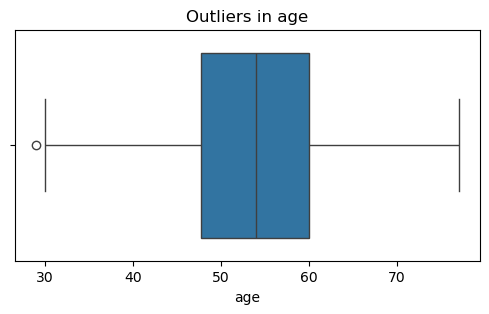

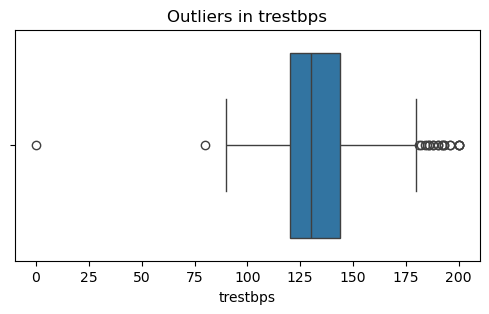

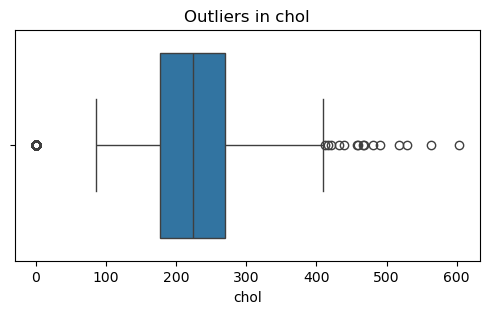

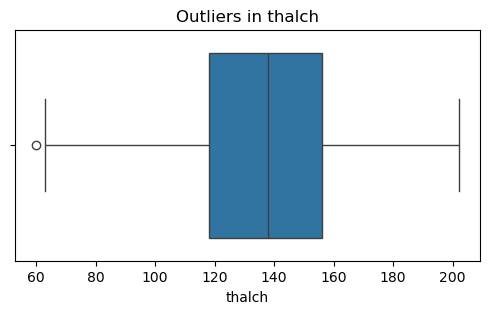

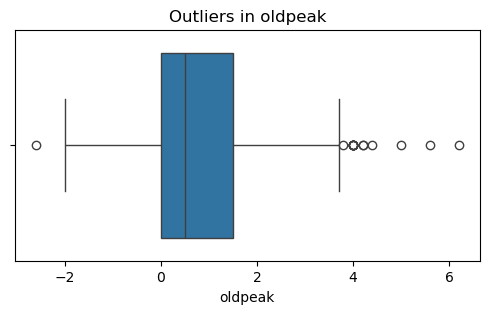

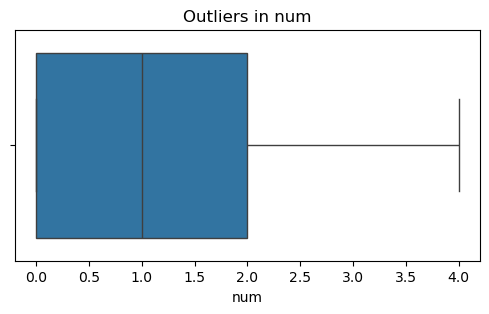

In [14]:
# Boxplots to visualize outliers
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [15]:
# Also check outlier values using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
print("\nOutlier Counts:")
print(outliers.sum())


Outlier Counts:
age           1
trestbps     22
chol        187
thalch        1
oldpeak      16
num           0
dtype: int64


In [16]:
# Check Inconsistencies
# Categorical columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
categorical_cols

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [17]:
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in sex:
['Male' 'Female']

Unique values in cp:
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']

Unique values in fbs:
[ True False]

Unique values in restecg:
['lv hypertrophy' 'normal' 'st-t abnormality']

Unique values in exang:
['FALSE' 'TRUE' 'TURE']

Unique values in slope:
['downsloping' 'flat' 'upsloping']

Unique values in thal:
['fixed defect' 'normal' 'reversable defect']


In [18]:
# Basic logical checks:
print("\nChecking value ranges:")
print("Age range:", df['age'].min(), "-", df['age'].max())
print("Chol range:", df['chol'].min(), "-", df['chol'].max())
print("Resting BP range:", df['trestbps'].min(), "-", df['trestbps'].max())
print("Max heart rate range:", df['thalch'].min(), "-", df['thalch'].max())
print("Oldpeak range:", df['oldpeak'].min(), "-", df['oldpeak'].max())


Checking value ranges:
Age range: 29 - 77
Chol range: 0 - 603
Resting BP range: 0 - 200
Max heart rate range: 60 - 202
Oldpeak range: -2.6 - 6.2


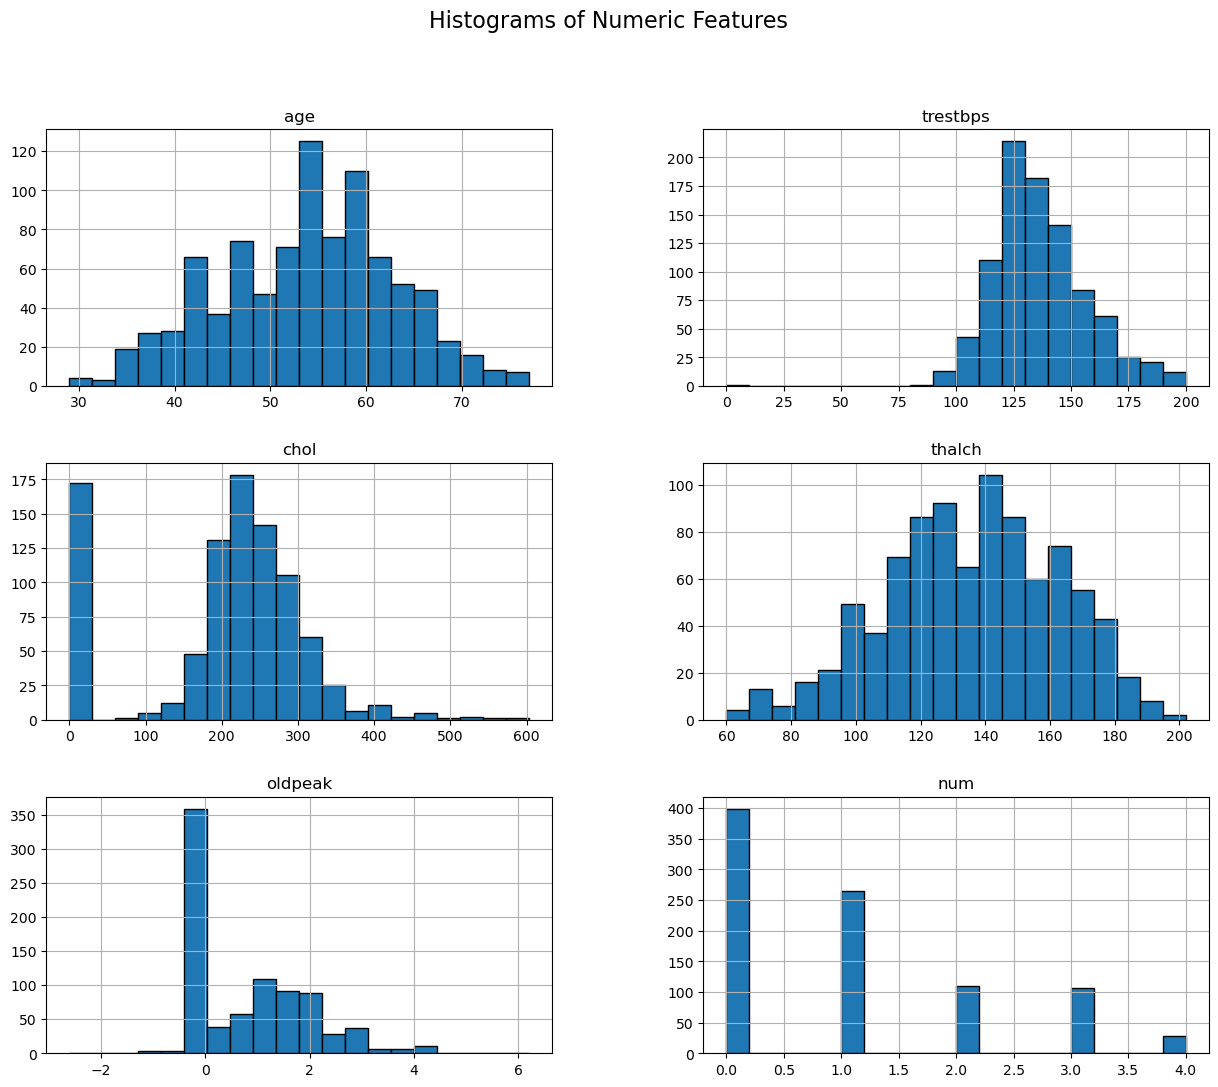

In [19]:
# Histograms for numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

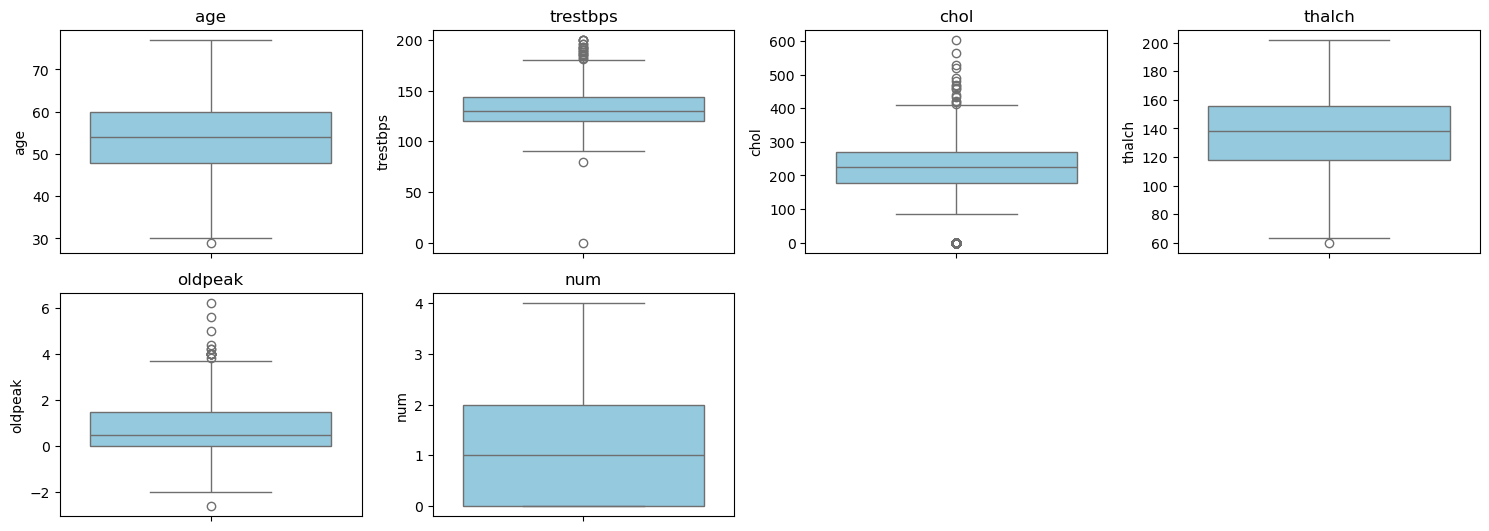

In [20]:
# Boxplots for numeric features
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

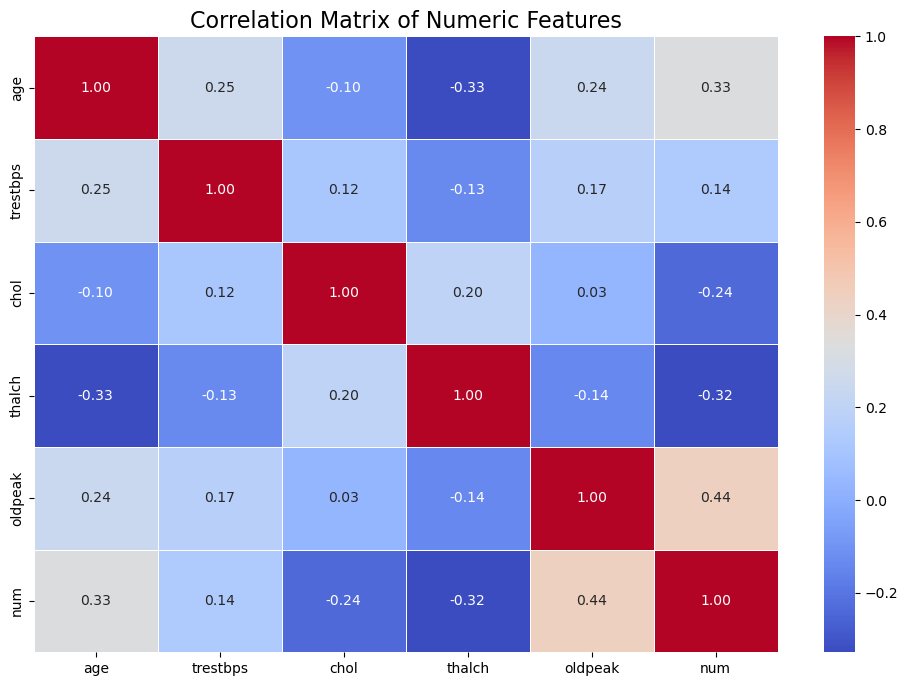

In [21]:
# 3. Correlation Matrix (Heatmap)
corr = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()

## Feature Engineering

In [22]:
# Handle Missing Values
# Separate features and target
X = df.drop("num", axis=1)   # features
y = df["num"]                # target

In [23]:
# Group target into binary classification (0 = no disease, 1 = disease)
y = y.apply(lambda x: 1 if x > 0 else 0)
y

0      0
1      0
2      0
3      0
4      0
      ..
903    1
904    1
905    1
906    1
907    1
Name: num, Length: 908, dtype: int64

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [25]:
# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numeric Columns:", numeric_cols)


Categorical Columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numeric Columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']


In [26]:
# For numeric features: impute missing values with median + scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [27]:
# For categorical features: impute missing values with most frequent + one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [28]:
# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'trestbps', 'chol', 'thalch',
                                  'oldpeak']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope', 'thal'])])

## Decision Tree Classification

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve


In [30]:
# Separate features and target
X = df.drop("num", axis=1)
y = df["num"]


In [31]:
# Optional: Convert target into binary (0 = no disease, 1 = disease)
y = y.apply(lambda x: 1 if x > 0 else 0)
y

0      0
1      0
2      0
3      0
4      0
      ..
903    1
904    1
905    1
906    1
907    1
Name: num, Length: 908, dtype: int64

In [32]:
# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [33]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (726, 12)
Testing set shape: (182, 12)


In [34]:
# Preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [35]:
# Decision Tree Classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        criterion='gini',   # or "entropy"
        max_depth=5,        # limit depth to avoid overfitting
        random_state=42))
])

In [36]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [37]:
# 6. Evaluation
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7087912087912088

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.72      0.69        80
           1       0.76      0.70      0.73       102

    accuracy                           0.71       182
   macro avg       0.71      0.71      0.71       182
weighted avg       0.71      0.71      0.71       182


Confusion Matrix:
 [[58 22]
 [31 71]]


In [38]:
# Predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC


In [39]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7087912087912088
Precision: 0.7634408602150538
Recall: 0.696078431372549
F1 Score: 0.7282051282051282
ROC-AUC: 0.7645833333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.72      0.69        80
           1       0.76      0.70      0.73       102

    accuracy                           0.71       182
   macro avg       0.71      0.71      0.71       182
weighted avg       0.71      0.71      0.71       182


Confusion Matrix:
 [[58 22]
 [31 71]]


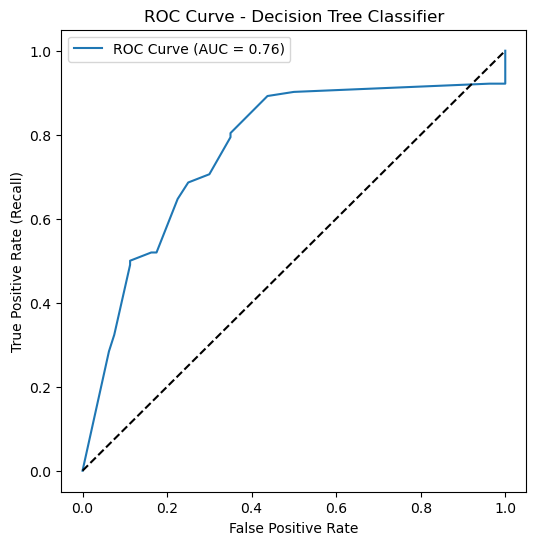

In [40]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Decision Tree Classifier")
plt.legend()
plt.show()

## Hyperparameter Tuning

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline


In [42]:
# Decision Tree + GridSearch
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [43]:
# Define hyperparameter grid
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__criterion': ['gini', 'entropy']
}
param_grid

{'classifier__max_depth': [3, 5, 7, 10, None],
 'classifier__min_samples_split': [2, 5, 10, 20],
 'classifier__criterion': ['gini', 'entropy']}

In [44]:
# Grid Search with 5-fold cross validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',   # optimize for ROC-AUC
    cv=5,
    n_jobs=-1
)
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalch',
                                                                          'oldpeak']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'cp',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'exang',
                                                                          'slope',
                                                                          'thal'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 5, 7, 10, None],
                         'classifier__min_samples_split': [2, 5, 10, 20]},
             scoring='roc_auc')

In [45]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalch',
                                                                          'oldpeak']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'cp',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'exang',
                                                                          'slope',
                                                                          'thal'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 5, 7, 10, None],
                         'classifier__min_samples_split': [2, 5, 10, 20]},
             scoring='roc_auc')

In [46]:
# Best Parameters & Model
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (ROC-AUC):", grid_search.best_score_)

Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_split': 2}
Best Cross-Validation Score (ROC-AUC): 0.836201176495892


In [47]:
# Best model
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [48]:
# Evaluate on Test Set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.7472527472527473
Test ROC-AUC: 0.8160539215686273

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74        80
           1       0.83      0.70      0.76       102

    accuracy                           0.75       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.76      0.75      0.75       182


Confusion Matrix:
 [[65 15]
 [31 71]]


## Model Evaluation and Analysis

In [49]:
from sklearn import tree


In [50]:
# Decision Tree Model
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        criterion='gini',
        max_depth=5,
        random_state=42
    ))
])
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [51]:
# Train the model
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [52]:
# Evaluation Metrics
print("🔹 Model Performance on Test Set")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))

print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔹 Model Performance on Test Set
Accuracy : 0.7472527472527473
Precision: 0.8255813953488372
Recall   : 0.696078431372549
F1 Score : 0.7553191489361702
ROC-AUC  : 0.8160539215686273

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74        80
           1       0.83      0.70      0.76       102

    accuracy                           0.75       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.76      0.75      0.75       182


🔹 Confusion Matrix:
 [[65 15]
 [31 71]]


In [53]:
# Extract trained decision tree from pipeline
dt_model = clf.named_steps["classifier"]
dt_model

DecisionTreeClassifier(max_depth=5, random_state=42)

In [54]:
# Get processed feature names (after OneHotEncoding)
feature_names = clf.named_steps["preprocessor"].get_feature_names_out()
feature_names

array(['num__age', 'num__trestbps', 'num__chol', 'num__thalch',
       'num__oldpeak', 'cat__sex_Female', 'cat__sex_Male',
       'cat__cp_asymptomatic', 'cat__cp_atypical angina',
       'cat__cp_non-anginal', 'cat__cp_typical angina', 'cat__fbs_False',
       'cat__fbs_True', 'cat__restecg_lv hypertrophy',
       'cat__restecg_normal', 'cat__restecg_st-t abnormality',
       'cat__exang_FALSE', 'cat__exang_TRUE', 'cat__exang_TURE',
       'cat__slope_downsloping', 'cat__slope_flat',
       'cat__slope_upsloping', 'cat__thal_fixed defect',
       'cat__thal_normal', 'cat__thal_reversable defect'], dtype=object)

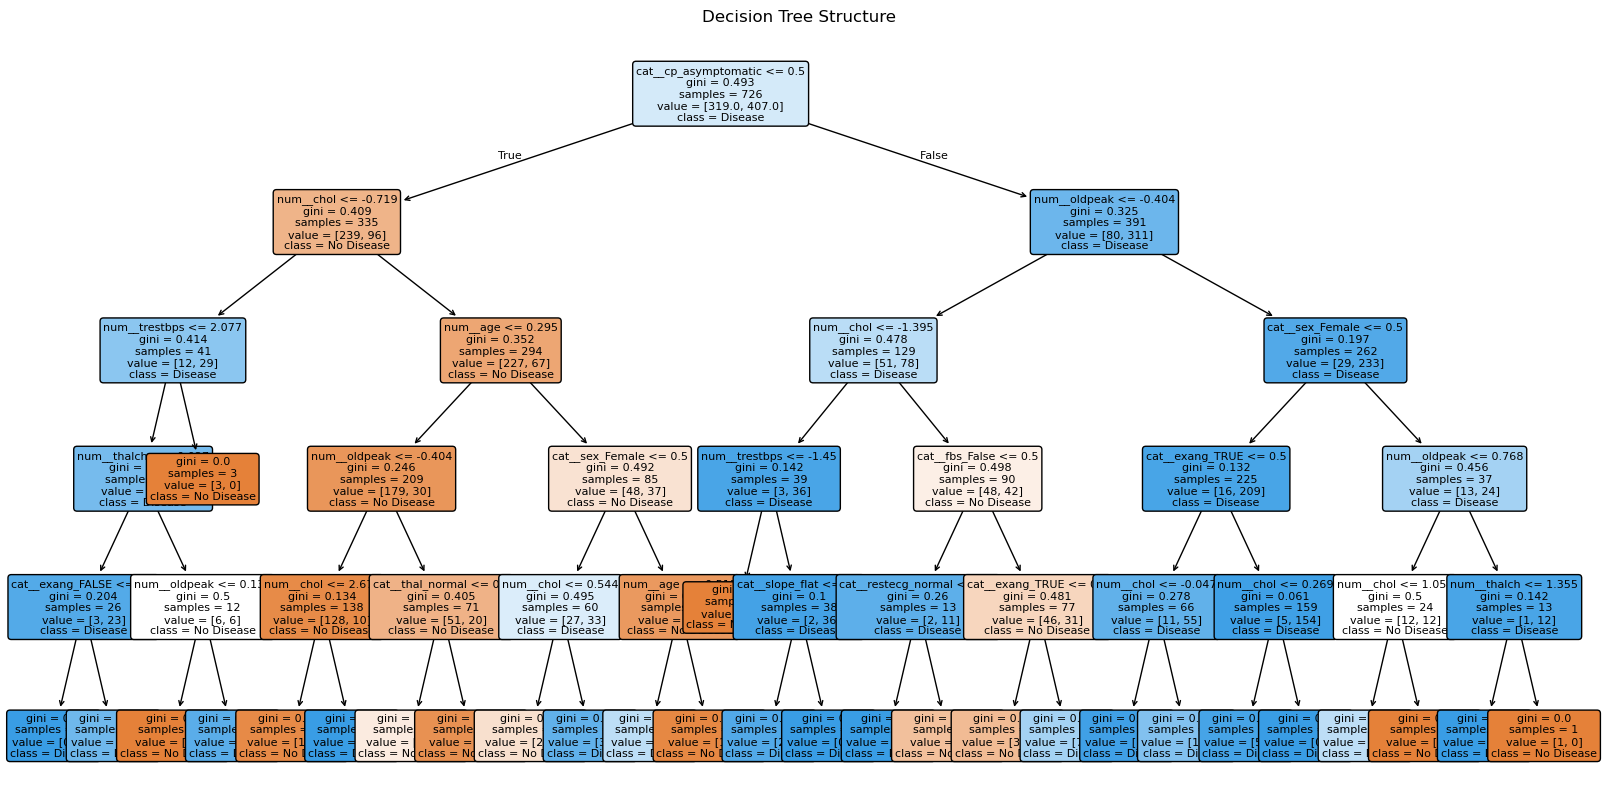

In [55]:
# Visualize the tree structure
plt.figure(figsize=(20,10))
tree.plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Structure")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10840\1357329153.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances.head(15), palette="viridis")


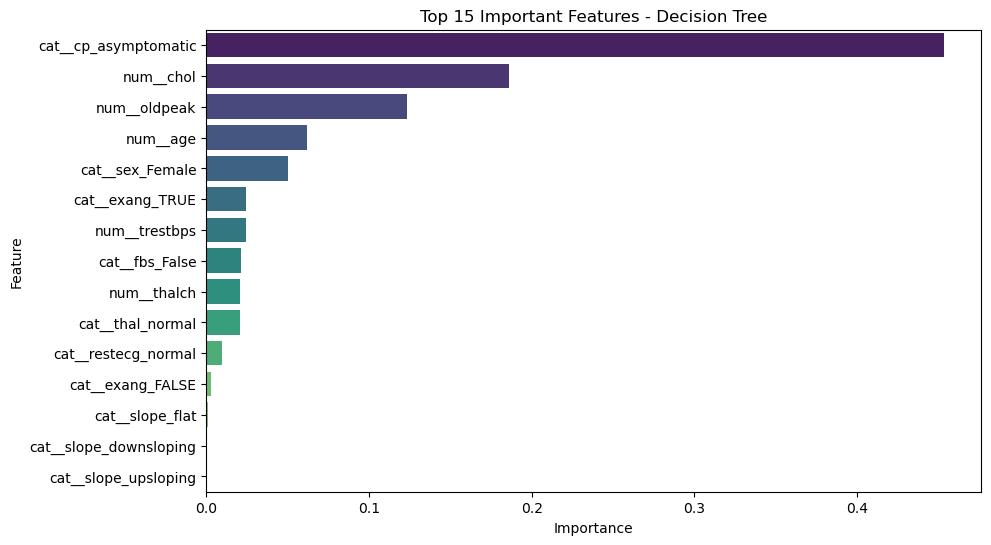

In [56]:
# Feature Importance
import pandas as pd
import seaborn as sns

feature_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importances.head(15), palette="viridis")
plt.title("Top 15 Important Features - Decision Tree")
plt.show()

## Conclusion

Decision Tree Classifier provides an interpretable and effective model for heart disease prediction. While the performance is promising, further improvements can be achieved by exploring ensemble methods such as Random Forest or Gradient Boosting, which typically outperform a single decision tree in terms of robustness and accuracy.

## Interview Questions

#### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Key Hyperparameters of Decision Trees :


1. max_depth

Maximum depth of the tree (how many levels of splits).

Low values → Shallow tree → underfitting (too simple, misses patterns).

High values / unlimited → Very deep tree → overfitting (memorizes training data, poor generalization).


2. min_samples_split

Minimum number of samples required to split a node.

Low values (e.g., 2) → More splits → complex tree → risk of overfitting.

High values → Less splits → simpler tree → risk of underfitting.


3. min_samples_leaf

Minimum number of samples required in a leaf node.

Prevents very small leaves that may not generalize well.

Higher values → smoother boundaries, less overfitting.


4. max_features

Number of features to consider when looking for the best split.

Options: "auto", "sqrt", "log2", or a number.

Reduces correlation between trees (important in Random Forests).

Lower values → more randomness, less overfitting

criterion

Function to measure the quality of a split.

Options: "gini" (default) or "entropy".

Both usually give similar results, but "entropy" is slower.


5. max_leaf_nodes

Maximum number of terminal nodes (leaves).

Controls complexity (similar to max_depth).


6. min_impurity_decrease

A node will only split if the impurity decrease is greater than this value.

Useful for pruning very small improvements.


7. class_weight

Handles imbalanced datasets.

"balanced" adjusts weights inversely proportional to class frequencies.


Effect on Model Performance :


Too complex tree (large depth, small min_samples) → High training accuracy, low test accuracy (overfitting).

Too simple tree (shallow, large min_samples) → Low training and test accuracy (underfitting).

Balanced tuning → Good generalization.

#### 2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding and One-Hot Encoding are two common techniques in Python for converting categorical data into a numerical format that machine learning algorithms can process. The key differences lie in how they represent the categories and their suitability for different types of data.


Label Encoding:

Mechanism: Assigns a unique integer to each category in a single column. For example, if a "Color" column has "Red", "Green", and "Blue", they might be encoded as 0, 1, and 2 respectively.

Dimensionality: Does not increase the dimensionality of the dataset; the categorical column is replaced by a single numerical column.

Suitability: Best for ordinal data, where there is an inherent order or ranking among the categories (e.g., "Low", "Medium", "High"). In such cases, the numerical order assigned by label encoding can reflect the actual order.

Potential Issue: For nominal data (categories without inherent order, like "Red", "Green", "Blue"), label encoding can introduce an artificial sense of order or magnitude to the algorithm, which can lead to incorrect assumptions and negatively impact model performance.


One-Hot Encoding:

Mechanism: Creates new binary columns for each unique category in the original column. Each new column represents the presence (1) or absence (0) of a specific category. For example, "Red", "Green", "Blue" would become three new columns: "Color_Red", "Color_Green", "Color_Blue". If a row's color is "Red", "Color_Red" would be 1, and the others would be 0.

Dimensionality: Increases the dimensionality of the dataset by adding a new column for each unique category.

Suitability: Best for nominal data, where there is no inherent order between categories. This method avoids introducing any artificial ordinal relationships that could mislead the model. 

Potential Issue: Can lead to a significant increase in the number of features (high dimensionality), especially with many unique categories, potentially impacting computational efficiency and increasing the risk of the "dummy variable trap" (multicollinearity), which can be mitigated by dropping one of the generated columns.

## END